In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy import units as u

In [3]:
pars = pd.read_csv('../catalogs+tables/supernovae_cat_rect_58_56_-31_-32.csv')

In [4]:
lcs = pd.read_csv('../lightcurves/lightcurves_cat_rect_58_56_-31_-32.csv')

In [5]:
pars.head()

,Unnamed: 0,htmid_level_6,galaxy_id,c_in,mB,t0_in,x0_in,x1_in,z_in,snid_in,snra_in,sndec_in
0,0,9197,3375000702,-0.046027,18.036843,61077.901961,0.000961,1.257934,0.060254,MS_9172_5,57.639403,-31.045886
1,1,9197,3375015265,-0.017979,20.709378,63089.102993,0.000083,-0.604813,0.161702,MS_9172_30,57.869726,-31.051645
2,2,9197,3375016182,0.090509,20.845817,62415.273663,0.000073,-1.663310,0.173414,MS_9172_35,57.455371,-31.020840
3,3,9197,3375027636,-0.048207,20.221406,61897.871707,0.000129,0.677895,0.197648,MS_9172_47,57.328133,-31.026872
4,4,9197,3375026039,-0.057482,20.726292,59805.838507,0.000081,1.063334,0.208735,MS_9172_56,57.568886,-31.144036


In [6]:
pars.sort_values('z_in', inplace=True)

Let's iterate through the `pars` table sorted by redshift. 

Create a sheet of lightcurves!

In [8]:
times = lcs['mjd']
filts = lcs['filter']

17.603111415297764
18.84063831761556
19.458338901959678
19.90563995418882
19.72204442354473
19.623643199654072
19.519168446132348
20.4522652467346
20.666347147903302
21.22727244291626
20.43659823566338
22.742137344228958
21.787395014340998
21.773494715774433
22.49606406995341
20.267392273282283
20.340985403741566
21.73213268434943
20.585449175001237
20.742922572872587
20.151590118334934
20.237603301142407
20.34528898403028
21.144352654818274
21.99383758244615
25.474047807253232
20.543983963854824
20.84613931480137
20.621251076142837
20.474900422706853
20.727567981087702
20.913450845603343
20.65231012620485
21.265197491499247
20.88746748798129
23.344440327679873
21.30498810912075
21.677342410881305
21.59250587170745
20.861785345069293
21.939786981514708
21.4033466105854
22.570527801827563
21.081473869903302
23.537999047206487
21.66010487804386
21.437509456715695
22.295366719255927
21.4230485101938
21.895472946686898
21.194516256515456
21.13576992791045
21.352054464847264
21.629138544497

<Figure size 432x288 with 0 Axes>

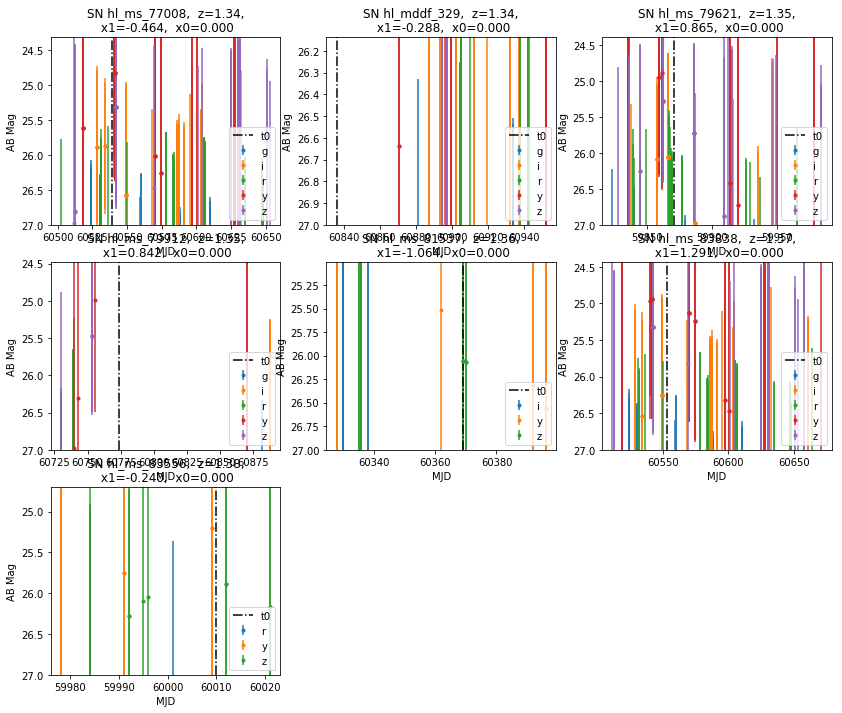

In [26]:
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
i = 1
i_page = 1
with PdfPages('multipage_pdf.pdf') as pdf:
    
    plt.figure()
    
    plt.figure(figsize=(14, 20))
    plt.title('LCs Page 1')
    for i_sn, a_sne in pars.iterrows():
        obj = a_sne['snid_in']
        lc1 = lcs[lcs[obj+'_flux']!=0][['mjd', 'filter', obj+'_flux', obj+'_fluxErr', obj+'_mag', obj+'_magErr']]

        if len(lc1) is 0:
            continue
        plt.subplot(5, 3, i)
        plt.title('SN %s,  z=%.2f,\n x1=%.3f,  x0=%.3f' % tuple(a_sne[['snid_in','z_in','x1_in','x0_in']].values))
        max_brights = []
        for afilt in np.unique(filts):
            thelc = lc1[lc1['filter']==afilt]
            if len(thelc) is not 0:
                plt.errorbar(thelc.mjd, thelc[obj+'_mag'], yerr=thelc[obj+'_magErr'], fmt='.', label=afilt)
            max_brights.append(np.min(thelc[obj+'_mag'])-0.5)
        max_brights = np.array(max_brights)
        max_brights = max_brights[~np.isnan(max_brights)]
        try: plt.ylim(27, np.max([17.5, np.min(max_brights)]))
        except: plt.gca().invert_yaxis()
            
        plt.axvline(x=a_sne['t0_in'], color='k', ls='-.', label='t0')
        #plt.gca().invert_yaxis()
        plt.legend(loc='lower right')
        plt.xlabel('MJD')
        plt.ylabel('AB Mag')
        i += 1
        if i == 16:
            i = 1
            plt.tight_layout()
            pdf.savefig()
            plt.close()
            
            plt.figure(figsize=(14, 20))
            plt.title('LCs Page %d' % i_page)
            
    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = 'Lightcurves from SALT2 pars WFD'
    d['Author'] = 'B. SANCHEZ'
    d['Subject'] = '2 sq.degree SNe in DC2 Run2.1i'
    
    d['CreationDate'] = datetime(2019, 11, 9)
    d['ModDate'] = datetime.today()

In [17]:
objects = [colname.strip('_fluxErr') for colname in lcs.columns if 'fluxErr' in colname ]

In [38]:
lc_tables = [lcs[lcs[obj+'_flux']!=0][['mjd', 'filter', obj+'_flux', obj+'_fluxErr', obj+'_mag', obj+'_magErr']] for obj in objects]

Text(0, 0.5, 'AB Mag')

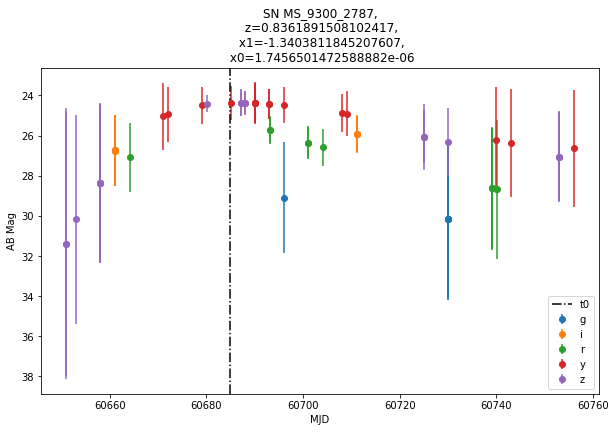

In [212]:
lc_len = 0
while lc_len < 20:
    i = np.random.randint(len(objects))
    #print(i)
    lc1 = lc_tables[i]
    #print(len(lc1))
    lc_len = len(lc1)
thisn_pars = pars[pars['snid_in']==objects[i]]

plt.figure(figsize=(10, 6))
for afilt in np.unique(filts):
    plt.title('SN {},\n z={},\n x1={},\n x0={}'.format(objects[i], 
        thisn_pars['z_in'].values[0], thisn_pars['x1_in'].values[0], 
        thisn_pars['x0_in'].values[0], ))
    
    thelc = lc1[lc1['filter']==afilt]
    if len(thelc) is not 0:
        plt.errorbar(thelc.mjd, thelc[objects[i]+'_mag'], yerr=thelc[objects[i]+'_magErr'], fmt='o', label=afilt)
plt.axvline(x=thisn_pars['t0_in'].values[0], color='k', ls='-.', label='t0')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.xlabel('MJD')
plt.ylabel('AB Mag')